# Neural Network Demo

### Dependencies and data

In [25]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

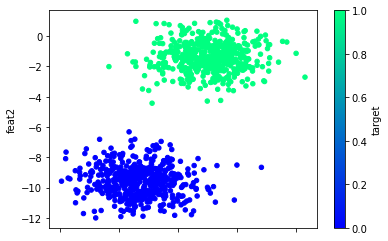

In [2]:
# Create data
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)
df = pd.DataFrame(X, columns=['feat1', 'feat2'])
df['target'] = y

# Plot data
df.plot(kind='scatter', x='feat1', y='feat2', c='target', colormap='winter')
plt.show()

In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [4]:
# Scale values
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=['feat1', 'feat2'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=['feat1', 'feat2'])
X_train_scaled.head()

,feat1,feat2
0,-0.458195,-0.993706
1,2.520789,1.201318
2,1.096509,0.896136
3,0.960125,1.145618
4,-0.720635,-1.189489


### Sequential neural network

In [5]:
# Sequential NN model
nn = tf.keras.models.Sequential()

# Add input layer with 2 features and 1st hidden layer with 1 neuron
in_layer = tf.keras.layers.Dense(units=1, activation='relu', input_dim=2)
nn.add(in_layer)

# Add output layer
out_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
nn.add(out_layer)

# Show model structure
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Train model
nn_trained = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 84us/sample - loss: 0.0872 - acc: 0.9987
Epoch 2/100
750/750 [==============================] - 0s 201us/sample - loss: 0.0858 - acc: 0.9987
Epoch 3/100
750/750 [==============================] - 0s 90us/sample - loss: 0.0844 - acc: 0.9987
Epoch 4/100
750/750 [==============================] - 0s 73us/sample - loss: 0.0831 - acc: 0.9987
Epoch 5/100
750/750 [==============================] - 0s 70us/sample - loss: 0.0817 - acc: 0.9987
Epoch 6/100
750/750 [==============================] - 0s 58us/sample - loss: 0.0804 - acc: 0.9987
Epoch 7/100
750/750 [==============================] - 0s 52us/sample - loss: 0.0792 - acc: 0.9987
Epoch 8/100
750/750 [==============================] - 0s 66us/sample - loss: 0.0779 - acc: 0.9987
Epoch 9/100
750/750 [==============================] - 0s 61us/sample - loss: 0.0767 - acc: 0.9987
Epoch 10/100
750/750 [==============================] - 0s 53us/sample - loss: 0.0755 - acc: 0.9987
Epoch 11

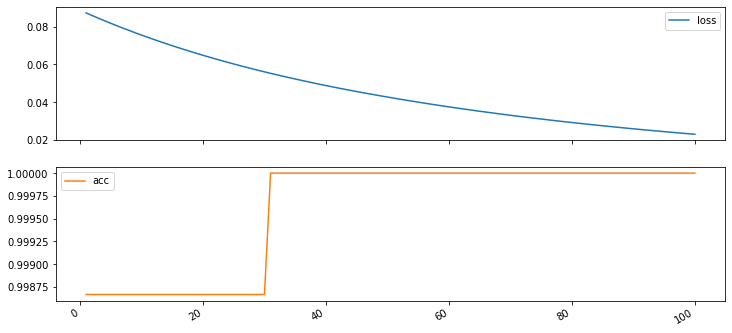

In [18]:
# Plot training loss and accuracy
nn_history = pd.DataFrame(nn_trained.history, index=range(1, len(nn_trained.history['loss']) + 1))
nn_history.plot(subplots=True, figsize=(12, 6))
plt.show()

In [20]:
# Evaluate model
nn.evaluate(X_test_scaled, y_test) # loss and accuracy

250/250 [==============================] - 0s 231us/sample - loss: 0.0221 - acc: 1.0000


[0.022140885159373284, 1.0]

In [27]:
# Create and scale new data
X2, y2 = make_blobs(n_samples=250, centers=2, n_features=2, random_state=250)
X2_scaled = pd.DataFrame(scaler.transform(X2), columns=['feat1', 'feat2'])

# Make predictions on new data
preds = nn.predict_classes(X2)
np.mean(y2 == preds.ravel()) # accuracy

0.964

In [29]:
np.sqrt(np.sum((y2 - nn.predict(X2).ravel()) ** 2))

2.5211409015974096